In [ ]:
!pip install yfinance #Web Scraping
!pip install pyplot #Data Visualization
!pip install finta #For getting Technical Indicator Data like Exponential Moving Average

##IMPORTING REQUIRED MODULES

In [2]:
import pandas as pd #Data Storing and Data Manipulation
import numpy as np #Data Storing
import yfinance as yf # Web Scraping
from finta import TA  #For getting Technical Indicators of the stock
from datetime import datetime
import matplotlib.pyplot as plt #For Visualization
import seaborn as sns #For Visualization
from plotly.subplots import make_subplots #For Visualization
import plotly.graph_objects as go #For Visualization
from plotly.graph_objs import Line #For Visualization

## WEB SCRAPING


In [3]:
ticker = yf.Ticker('RELIANCE.NS') # Reliance Stock

In [4]:
df = ticker.history(period='max')

In [5]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01,10.471227,10.527414,10.402270,10.509537,48051995,0.0,0.0
1996-01-02,10.483999,10.535078,10.351193,10.427812,77875009,0.0,0.0
1996-01-03,10.598926,11.081624,10.483998,10.506984,96602936,0.0,0.0
1996-01-04,10.407378,10.440580,10.269464,10.409932,100099436,0.0,0.0
1996-01-05,10.369069,10.369069,10.249032,10.338421,76935930,0.0,0.0
...,...,...,...,...,...,...,...
2022-05-27,2593.050049,2605.149902,2540.100098,2575.100098,7624888,0.0,0.0
2022-05-30,2615.000000,2674.000000,2594.199951,2664.800049,6393341,0.0,0.0
2022-05-31,2641.399902,2678.800049,2615.699951,2632.649902,32591420,0.0,0.0


In [6]:
ticker.info

{'52WeekChange': 0.19181776,
 'SandP52WeekChange': -0.02185148,
 'address1': 'Maker Chambers IV',
 'address2': '3rd Floor 222 Nariman Point',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 0,
 'askSize': 0,
 'averageDailyVolume10Day': 9536541,
 'averageVolume': 7576485,
 'averageVolume10days': 9536541,
 'beta': 0.955614,
 'beta3Year': None,
 'bid': 0,
 'bidSize': 0,
 'bookValue': 1132.233,
 'category': None,
 'circulatingSupply': None,
 'city': 'Mumbai',
 'companyOfficers': [],
 'country': 'India',
 'currency': 'INR',
 'currentPrice': 2724.3,
 'currentRatio': None,
 'dateShortInterest': None,
 'dayHigh': 2732.45,
 'dayLow': 2634,
 'debtToEquity': 31.21,
 'dividendRate': 7,
 'dividendYield': 0.0027,
 'earningsGrowth': 0.393,
 'earningsQuarterlyGrowth': 0.416,
 'ebitda': 994277523456,
 'ebitdaMargins': 0.15483,
 'enterpriseToEbitda': 18.441,
 'enterpriseToRevenue': 2.855,
 'enterpriseValue': 18335190220800,
 'exDividendDate': 1623369600,
 

##DATA ENGINEERING (Reliance Data)

In [7]:
df.shape  #6644 Rows and 7 Columns

(6645, 7)

In [8]:
df.info()  #This tells us that there is no 'NULL' present in the dataset. Can also check from df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6645 entries, 1996-01-01 to 2022-06-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6645 non-null   float64
 1   High          6645 non-null   float64
 2   Low           6645 non-null   float64
 3   Close         6645 non-null   float64
 4   Volume        6645 non-null   int64  
 5   Dividends     6645 non-null   float64
 6   Stock Splits  6645 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 415.3 KB


In [9]:
#Null Check
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [10]:
df.dtypes  #Date is coming as index. So we need to add index column

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [11]:
df['Date'] = df.index
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
1996-01-01,10.471227,10.527414,10.402270,10.509537,48051995,0.0,0.0,1996-01-01
1996-01-02,10.483999,10.535078,10.351193,10.427812,77875009,0.0,0.0,1996-01-02
1996-01-03,10.598926,11.081624,10.483998,10.506984,96602936,0.0,0.0,1996-01-03
1996-01-04,10.407378,10.440580,10.269464,10.409932,100099436,0.0,0.0,1996-01-04
1996-01-05,10.369069,10.369069,10.249032,10.338421,76935930,0.0,0.0,1996-01-05
...,...,...,...,...,...,...,...,...
2022-05-27,2593.050049,2605.149902,2540.100098,2575.100098,7624888,0.0,0.0,2022-05-27
2022-05-30,2615.000000,2674.000000,2594.199951,2664.800049,6393341,0.0,0.0,2022-05-30
2022-05-31,2641.399902,2678.800049,2615.699951,2632.649902,32591420,0.0,0.0,2022-05-31


In [12]:
#Correcting the Column Order and resetting index
df = df[['Date','Open','High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']]
df.reset_index(inplace = True, drop = True)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1996-01-01,10.471227,10.527414,10.402270,10.509537,48051995,0.0,0.0
1,1996-01-02,10.483999,10.535078,10.351193,10.427812,77875009,0.0,0.0
2,1996-01-03,10.598926,11.081624,10.483998,10.506984,96602936,0.0,0.0
3,1996-01-04,10.407378,10.440580,10.269464,10.409932,100099436,0.0,0.0
4,1996-01-05,10.369069,10.369069,10.249032,10.338421,76935930,0.0,0.0
...,...,...,...,...,...,...,...,...
6640,2022-05-27,2593.050049,2605.149902,2540.100098,2575.100098,7624888,0.0,0.0
6641,2022-05-30,2615.000000,2674.000000,2594.199951,2664.800049,6393341,0.0,0.0
6642,2022-05-31,2641.399902,2678.800049,2615.699951,2632.649902,32591420,0.0,0.0
6643,2022-06-01,2634.300049,2655.199951,2616.199951,2633.500000,4512079,0.0,0.0


In [13]:
#Descriptive Statistics
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6645.000000,6645.000000,6645.000000,6645.000000,6.645000e+03,6645.000000,6645.000000
mean,481.205837,487.208188,474.775008,480.759113,2.958938e+07,0.012774,0.000903
std,601.383346,608.337717,594.020864,600.917776,4.891474e+07,0.240071,0.042489
min,7.815112,7.850868,7.766587,7.850868,0.000000e+00,0.000000,0.000000
25%,40.122127,40.817013,39.542784,40.121761,6.896498e+06,0.000000,0.000000
50%,372.117544,377.576212,367.434356,372.391754,1.276800e+07,0.000000,0.000000
75%,497.770882,504.076540,490.828492,496.977539,3.169939e+07,0.000000,0.000000
max,2856.149902,2856.149902,2786.100098,2819.850098,6.686620e+08,7.000000,2.000000


In [14]:
#Adding few columns for Data Analysis
df['Open-High'] = df['Open'] - df['High']
df['Open-Low'] = df['Open'] - df['Low']
df['Close-High'] = df['Close'] - df['High']
df['Close-Low'] = df['Close'] - df['Low']
df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open'] - df['Close']

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open-High,Open-Low,Close-High,Close-Low,High-Low,Open-Close
0,1996-01-01,10.471227,10.527414,10.402270,10.509537,48051995,0.0,0.0,-0.056187,0.068957,-0.017877,0.107267,0.125144,-0.038309
1,1996-01-02,10.483999,10.535078,10.351193,10.427812,77875009,0.0,0.0,-0.051079,0.132806,-0.107266,0.076619,0.183885,0.056187
2,1996-01-03,10.598926,11.081624,10.483998,10.506984,96602936,0.0,0.0,-0.482698,0.114929,-0.574641,0.022986,0.597627,0.091943
3,1996-01-04,10.407378,10.440580,10.269464,10.409932,100099436,0.0,0.0,-0.033202,0.137914,-0.030648,0.140468,0.171115,-0.002554
4,1996-01-05,10.369069,10.369069,10.249032,10.338421,76935930,0.0,0.0,0.000000,0.120036,-0.030648,0.089389,0.120036,0.030648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,2022-05-27,2593.050049,2605.149902,2540.100098,2575.100098,7624888,0.0,0.0,-12.099854,52.949951,-30.049805,35.000000,65.049805,17.949951
6641,2022-05-30,2615.000000,2674.000000,2594.199951,2664.800049,6393341,0.0,0.0,-59.000000,20.800049,-9.199951,70.600098,79.800049,-49.800049
6642,2022-05-31,2641.399902,2678.800049,2615.699951,2632.649902,32591420,0.0,0.0,-37.400146,25.699951,-46.150146,16.949951,63.100098,8.750000
6643,2022-06-01,2634.300049,2655.199951,2616.199951,2633.500000,4512079,0.0,0.0,-20.899902,18.100098,-21.699951,17.300049,39.000000,0.800049


In [15]:
#Lets add a feature AvgPrice as (O + H + L + C) / 4
values = (df['High'] + df['Low'] + df['Open'] + df['Close'])/4
df = df.assign(AvgPrice = values)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open-High,Open-Low,Close-High,Close-Low,High-Low,Open-Close,AvgPrice
0,1996-01-01,10.471227,10.527414,10.402270,10.509537,48051995,0.0,0.0,-0.056187,0.068957,-0.017877,0.107267,0.125144,-0.038309,10.477612
1,1996-01-02,10.483999,10.535078,10.351193,10.427812,77875009,0.0,0.0,-0.051079,0.132806,-0.107266,0.076619,0.183885,0.056187,10.449520
2,1996-01-03,10.598926,11.081624,10.483998,10.506984,96602936,0.0,0.0,-0.482698,0.114929,-0.574641,0.022986,0.597627,0.091943,10.667883
3,1996-01-04,10.407378,10.440580,10.269464,10.409932,100099436,0.0,0.0,-0.033202,0.137914,-0.030648,0.140468,0.171115,-0.002554,10.381839
4,1996-01-05,10.369069,10.369069,10.249032,10.338421,76935930,0.0,0.0,0.000000,0.120036,-0.030648,0.089389,0.120036,0.030648,10.331398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,2022-05-27,2593.050049,2605.149902,2540.100098,2575.100098,7624888,0.0,0.0,-12.099854,52.949951,-30.049805,35.000000,65.049805,17.949951,2578.350037
6641,2022-05-30,2615.000000,2674.000000,2594.199951,2664.800049,6393341,0.0,0.0,-59.000000,20.800049,-9.199951,70.600098,79.800049,-49.800049,2637.000000
6642,2022-05-31,2641.399902,2678.800049,2615.699951,2632.649902,32591420,0.0,0.0,-37.400146,25.699951,-46.150146,16.949951,63.100098,8.750000,2642.137451
6643,2022-06-01,2634.300049,2655.199951,2616.199951,2633.500000,4512079,0.0,0.0,-20.899902,18.100098,-21.699951,17.300049,39.000000,0.800049,2634.799988


In [16]:
df.AvgPrice.describe()

count    6645.000000
mean      480.987036
std       601.132515
min         7.850868
25%        40.081337
50%       372.543525
75%       497.277584
max      2819.962463
Name: AvgPrice, dtype: float64

In [17]:
#Calculating Growth Column (Essentially means how much growth has happened for each day from 1st Day Average Price)

df['Stock'] = 'Reliance'
stock_names = df.Stock.unique()

day1_price = df[df.Date == df.Date.min()].AvgPrice  #Day 1 Average Price

price_mapping = {n : c for n, c in zip(stock_names, day1_price)}
base_mapping = np.array(list(map(lambda x : price_mapping[x], df['Stock'].values)))

df['Growth'] = df['AvgPrice'] / base_mapping - 1

df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open-High,Open-Low,Close-High,Close-Low,High-Low,Open-Close,AvgPrice,Stock,Growth
0,1996-01-01,10.471227,10.527414,10.402270,10.509537,48051995,0.0,0.0,-0.056187,0.068957,-0.017877,0.107267,0.125144,-0.038309,10.477612,Reliance,0.000000
1,1996-01-02,10.483999,10.535078,10.351193,10.427812,77875009,0.0,0.0,-0.051079,0.132806,-0.107266,0.076619,0.183885,0.056187,10.449520,Reliance,-0.002681
2,1996-01-03,10.598926,11.081624,10.483998,10.506984,96602936,0.0,0.0,-0.482698,0.114929,-0.574641,0.022986,0.597627,0.091943,10.667883,Reliance,0.018160
3,1996-01-04,10.407378,10.440580,10.269464,10.409932,100099436,0.0,0.0,-0.033202,0.137914,-0.030648,0.140468,0.171115,-0.002554,10.381839,Reliance,-0.009141
4,1996-01-05,10.369069,10.369069,10.249032,10.338421,76935930,0.0,0.0,0.000000,0.120036,-0.030648,0.089389,0.120036,0.030648,10.331398,Reliance,-0.013955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,2022-05-27,2593.050049,2605.149902,2540.100098,2575.100098,7624888,0.0,0.0,-12.099854,52.949951,-30.049805,35.000000,65.049805,17.949951,2578.350037,Reliance,245.081838
6641,2022-05-30,2615.000000,2674.000000,2594.199951,2664.800049,6393341,0.0,0.0,-59.000000,20.800049,-9.199951,70.600098,79.800049,-49.800049,2637.000000,Reliance,250.679484
6642,2022-05-31,2641.399902,2678.800049,2615.699951,2632.649902,32591420,0.0,0.0,-37.400146,25.699951,-46.150146,16.949951,63.100098,8.750000,2642.137451,Reliance,251.169811
6643,2022-06-01,2634.300049,2655.199951,2616.199951,2633.500000,4512079,0.0,0.0,-20.899902,18.100098,-21.699951,17.300049,39.000000,0.800049,2634.799988,Reliance,250.469512


In [18]:
df.Growth.describe()  #Tells us that Reliance grew by 26814% from its listing price 

count    6645.000000
mean       44.906170
std        57.373046
min        -0.250701
25%         2.825427
50%        34.556148
75%        46.460965
max       268.141714
Name: Growth, dtype: float64

In [19]:
#Moving Average Calculation of Reliance
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in stock_names:
        column_name = f"MA for {ma} days"
        df[column_name] = df['Close'].rolling(ma).mean()

df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open-High,Open-Low,Close-High,Close-Low,High-Low,Open-Close,AvgPrice,Stock,Growth,MA for 10 days,MA for 20 days,MA for 50 days
0,1996-01-01,10.471227,10.527414,10.402270,10.509537,48051995,0.0,0.0,-0.056187,0.068957,-0.017877,0.107267,0.125144,-0.038309,10.477612,Reliance,0.000000,NaN,NaN,NaN
1,1996-01-02,10.483999,10.535078,10.351193,10.427812,77875009,0.0,0.0,-0.051079,0.132806,-0.107266,0.076619,0.183885,0.056187,10.449520,Reliance,-0.002681,NaN,NaN,NaN
2,1996-01-03,10.598926,11.081624,10.483998,10.506984,96602936,0.0,0.0,-0.482698,0.114929,-0.574641,0.022986,0.597627,0.091943,10.667883,Reliance,0.018160,NaN,NaN,NaN
3,1996-01-04,10.407378,10.440580,10.269464,10.409932,100099436,0.0,0.0,-0.033202,0.137914,-0.030648,0.140468,0.171115,-0.002554,10.381839,Reliance,-0.009141,NaN,NaN,NaN
4,1996-01-05,10.369069,10.369069,10.249032,10.338421,76935930,0.0,0.0,0.000000,0.120036,-0.030648,0.089389,0.120036,0.030648,10.331398,Reliance,-0.013955,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,2022-05-27,2593.050049,2605.149902,2540.100098,2575.100098,7624888,0.0,0.0,-12.099854,52.949951,-30.049805,35.000000,65.049805,17.949951,2578.350037,Reliance,245.081838,2559.595020,2569.504993,2597.838999
6641,2022-05-30,2615.000000,2674.000000,2594.199951,2664.800049,6393341,0.0,0.0,-59.000000,20.800049,-9.199951,70.600098,79.800049,-49.800049,2637.000000,Reliance,250.679484,2583.355029,2563.232495,2603.866001
6642,2022-05-31,2641.399902,2678.800049,2615.699951,2632.649902,32591420,0.0,0.0,-37.400146,25.699951,-46.150146,16.949951,63.100098,8.750000,2642.137451,Reliance,251.169811,2593.705029,2555.842493,2608.451997
6643,2022-06-01,2634.300049,2655.199951,2616.199951,2633.500000,4512079,0.0,0.0,-20.899902,18.100098,-21.699951,17.300049,39.000000,0.800049,2634.799988,Reliance,250.469512,2603.220020,2552.834998,2611.487998


In [20]:
#Lets use the Finta API to get more Technical Indicators
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']
def _get_indicator_data(data):
  
  for indicator in INDICATORS:
        ind_data = eval('TA.' + indicator + '(data)')
        if not isinstance(ind_data, pd.DataFrame):
            ind_data = ind_data.to_frame()
        data = data.merge(ind_data, left_index=True, right_index=True)
  data.rename(columns={"14 period EMV.": '14 period EMV'}, inplace=True)

  # Also calculate moving averages for features
  data['ema50'] = data['Close'] / data['Close'].ewm(50).mean()
  data['ema21'] = data['Close'] / data['Close'].ewm(21).mean()
  data['ema15'] = data['Close'] / data['Close'].ewm(14).mean()
  data['ema5'] = data['Close'] / data['Close'].ewm(5).mean()

  # Instead of using the actual volume value (which changes over time), we normalize it with a moving volume average
  data['normVol'] = data['Volume'] / data['Volume'].ewm(5).mean()

  # Remove columns that won't be used as features
  return data

data = _get_indicator_data(df)

data.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Open-High', 'Open-Low', 'Close-High', 'Close-Low',
       'High-Low', 'Open-Close', 'AvgPrice', 'Stock', 'Growth',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', '14 period RSI',
       'MACD', 'SIGNAL', '14 period STOCH %K', 'MFV', '14 period ATR', 'MOM',
       '14 period MFI', 'ROC', 'OBV', '20 period CCI', '14 period EMV', 'VIm',
       'VIp', 'ema50', 'ema21', 'ema15', 'ema5', 'normVol'],
      dtype='object')

In [21]:
#Function that produces the 'truth' values
#At a given row, it looks lookahead rows ahead to see if the price increased (1) or decreased (0)
#param lookahead: number of days, or rows to look ahead to see what the price did
#1 means buy and 0 means sell. This could be used as a dependent variable in our Model

def _produce_prediction(data, lookahead):

    
    prediction = (data.shift(-lookahead)['Close'] >= data['Close'])
    prediction = prediction.iloc[:-lookahead]
    data['pred'] = prediction.astype(int)
    return data

data2 = _produce_prediction(data, lookahead=15)
data3 = data2.dropna() # We are removing observations which has NULL Data in any of the columns

data3

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open-High,Open-Low,...,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol,pred
83,1996-04-25,13.127346,13.408282,12.156842,12.376482,286231521,0.0,0.0,-0.280936,0.970504,...,121.097087,0.000285,0.644142,1.030193,1.129629,1.099700,1.082280,1.031492,1.204079,1.0
84,1996-04-26,12.361158,12.639540,12.054684,12.486303,291913819,0.0,0.0,-0.278382,0.306475,...,84.578606,0.000206,0.786571,1.015073,1.135833,1.103859,1.085217,1.033643,1.183031,1.0
85,1996-04-29,12.361159,12.425008,12.144072,12.384144,194330440,0.0,0.0,-0.063849,0.217086,...,69.033859,0.000179,0.835379,1.009543,1.123132,1.090041,1.070873,1.020901,0.816466,0.0
86,1996-04-30,12.361152,12.769786,12.284533,12.496511,198150092,0.0,0.0,-0.408634,0.076619,...,78.380712,0.000225,0.788000,1.026375,1.129728,1.094870,1.074801,1.025011,0.856420,0.0
87,1996-05-01,13.638136,13.786266,13.497669,13.589611,228659480,0.0,0.0,-0.148130,0.140467,...,155.919533,0.000343,0.729972,1.065993,1.221910,1.180240,1.155779,1.093767,0.990218,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,2022-05-06,2612.199951,2659.000000,2593.550049,2620.649902,9068448,0.0,0.0,-46.800049,18.649902,...,-46.293518,-12.275562,0.896888,0.998360,1.041431,1.005016,0.989474,0.970305,1.121201,0.0
6626,2022-05-09,2574.949951,2597.100098,2507.000000,2518.300049,8345649,0.0,0.0,-22.150146,67.949951,...,-107.264779,-52.855903,0.907981,0.926675,1.000743,0.967270,0.953957,0.943033,1.026390,1.0
6627,2022-05-10,2495.000000,2526.600098,2458.000000,2474.649902,9004636,0.0,0.0,-31.600098,37.000000,...,-138.509611,-132.955759,1.065462,0.861237,0.983717,0.952648,0.941349,0.938150,1.087955,1.0
6628,2022-05-11,2472.649902,2484.949951,2421.949951,2449.300049,7681157,0.0,0.0,-12.300049,50.699951,...,-146.041284,-198.705403,1.170961,0.744945,0.974144,0.945343,0.935968,0.939732,0.939314,1.0


In [22]:
#Lets Compute Volume Shocks for our Analysis:

def volume_shocks(stock):

    stock["Volume_t-1"] = stock.Volume.shift(1)  #Volume One Day Before
    
    stock["Volume_Shock"] = ((abs(stock["Volume"] - stock["Volume_t-1"])/stock["Volume"]*100)  > 10).astype(int)
    
    return stock

#Calculating Direction of Volume Shock

def direction_function(stock):
    
    # considerng only shock - 1 valued rows.
    # 0 - negative and 1- positive
    if stock["Volume_Shock"] == 0:
        pass
    else:
        if (stock["Volume"] - stock["Volume_t-1"]) > 0:
            return 1  #Volume Shock in Positive Direction
        else:
            return -1 #Volume Shock in Negative Direction

def vol_shock_direction(stock):
    stock['Vol_Shock_Dir'] = 0
    stock['Vol_Shock_Dir'] = stock.apply(direction_function, axis=1)
    return stock


data4 = volume_shocks(data3)
data5 = vol_shock_direction(data4)

#Converting NaN values to 0 for Volume Shock Direction
data5['Vol_Shock_Dir'] = data5['Vol_Shock_Dir'].fillna(0)
data5





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open-High,Open-Low,...,VIp,ema50,ema21,ema15,ema5,normVol,pred,Volume_t-1,Volume_Shock,Vol_Shock_Dir
83,1996-04-25,13.127346,13.408282,12.156842,12.376482,286231521,0.0,0.0,-0.280936,0.970504,...,1.030193,1.129629,1.099700,1.082280,1.031492,1.204079,1.0,NaN,0,0.0
84,1996-04-26,12.361158,12.639540,12.054684,12.486303,291913819,0.0,0.0,-0.278382,0.306475,...,1.015073,1.135833,1.103859,1.085217,1.033643,1.183031,1.0,286231521.0,0,0.0
85,1996-04-29,12.361159,12.425008,12.144072,12.384144,194330440,0.0,0.0,-0.063849,0.217086,...,1.009543,1.123132,1.090041,1.070873,1.020901,0.816466,0.0,291913819.0,1,-1.0
86,1996-04-30,12.361152,12.769786,12.284533,12.496511,198150092,0.0,0.0,-0.408634,0.076619,...,1.026375,1.129728,1.094870,1.074801,1.025011,0.856420,0.0,194330440.0,0,0.0
87,1996-05-01,13.638136,13.786266,13.497669,13.589611,228659480,0.0,0.0,-0.148130,0.140467,...,1.065993,1.221910,1.180240,1.155779,1.093767,0.990218,0.0,198150092.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,2022-05-06,2612.199951,2659.000000,2593.550049,2620.649902,9068448,0.0,0.0,-46.800049,18.649902,...,0.998360,1.041431,1.005016,0.989474,0.970305,1.121201,0.0,7942721.0,1,1.0
6626,2022-05-09,2574.949951,2597.100098,2507.000000,2518.300049,8345649,0.0,0.0,-22.150146,67.949951,...,0.926675,1.000743,0.967270,0.953957,0.943033,1.026390,1.0,9068448.0,0,0.0
6627,2022-05-10,2495.000000,2526.600098,2458.000000,2474.649902,9004636,0.0,0.0,-31.600098,37.000000,...,0.861237,0.983717,0.952648,0.941349,0.938150,1.087955,1.0,8345649.0,0,0.0
6628,2022-05-11,2472.649902,2484.949951,2421.949951,2449.300049,7681157,0.0,0.0,-12.300049,50.699951,...,0.744945,0.974144,0.945343,0.935968,0.939732,0.939314,1.0,9004636.0,1,-1.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6645 entries, 0 to 6644
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            6645 non-null   datetime64[ns]
 1   Open            6645 non-null   float64       
 2   High            6645 non-null   float64       
 3   Low             6645 non-null   float64       
 4   Close           6645 non-null   float64       
 5   Volume          6645 non-null   int64         
 6   Dividends       6645 non-null   float64       
 7   Stock Splits    6645 non-null   float64       
 8   Open-High       6645 non-null   float64       
 9   Open-Low        6645 non-null   float64       
 10  Close-High      6645 non-null   float64       
 11  Close-Low       6645 non-null   float64       
 12  High-Low        6645 non-null   float64       
 13  Open-Close      6645 non-null   float64       
 14  AvgPrice        6645 non-null   float64       
 15  Stoc

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6645 entries, 0 to 6644
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                6645 non-null   datetime64[ns]
 1   Open                6645 non-null   float64       
 2   High                6645 non-null   float64       
 3   Low                 6645 non-null   float64       
 4   Close               6645 non-null   float64       
 5   Volume              6645 non-null   int64         
 6   Dividends           6645 non-null   float64       
 7   Stock Splits        6645 non-null   float64       
 8   Open-High           6645 non-null   float64       
 9   Open-Low            6645 non-null   float64       
 10  Close-High          6645 non-null   float64       
 11  Close-Low           6645 non-null   float64       
 12  High-Low            6645 non-null   float64       
 13  Open-Close          6645 non-null   float64     

In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6645 entries, 0 to 6644
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                6645 non-null   datetime64[ns]
 1   Open                6645 non-null   float64       
 2   High                6645 non-null   float64       
 3   Low                 6645 non-null   float64       
 4   Close               6645 non-null   float64       
 5   Volume              6645 non-null   int64         
 6   Dividends           6645 non-null   float64       
 7   Stock Splits        6645 non-null   float64       
 8   Open-High           6645 non-null   float64       
 9   Open-Low            6645 non-null   float64       
 10  Close-High          6645 non-null   float64       
 11  Close-Low           6645 non-null   float64       
 12  High-Low            6645 non-null   float64       
 13  Open-Close          6645 non-null   float64     

In [26]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5353 entries, 83 to 6629
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5353 non-null   datetime64[ns]
 1   Open                5353 non-null   float64       
 2   High                5353 non-null   float64       
 3   Low                 5353 non-null   float64       
 4   Close               5353 non-null   float64       
 5   Volume              5353 non-null   int64         
 6   Dividends           5353 non-null   float64       
 7   Stock Splits        5353 non-null   float64       
 8   Open-High           5353 non-null   float64       
 9   Open-Low            5353 non-null   float64       
 10  Close-High          5353 non-null   float64       
 11  Close-Low           5353 non-null   float64       
 12  High-Low            5353 non-null   float64       
 13  Open-Close          5353 non-null   float64    

In [27]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5353 entries, 83 to 6629
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5353 non-null   datetime64[ns]
 1   Open                5353 non-null   float64       
 2   High                5353 non-null   float64       
 3   Low                 5353 non-null   float64       
 4   Close               5353 non-null   float64       
 5   Volume              5353 non-null   int64         
 6   Dividends           5353 non-null   float64       
 7   Stock Splits        5353 non-null   float64       
 8   Open-High           5353 non-null   float64       
 9   Open-Low            5353 non-null   float64       
 10  Close-High          5353 non-null   float64       
 11  Close-Low           5353 non-null   float64       
 12  High-Low            5353 non-null   float64       
 13  Open-Close          5353 non-null   float64    

In [28]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5353 entries, 83 to 6629
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5353 non-null   datetime64[ns]
 1   Open                5353 non-null   float64       
 2   High                5353 non-null   float64       
 3   Low                 5353 non-null   float64       
 4   Close               5353 non-null   float64       
 5   Volume              5353 non-null   int64         
 6   Dividends           5353 non-null   float64       
 7   Stock Splits        5353 non-null   float64       
 8   Open-High           5353 non-null   float64       
 9   Open-Low            5353 non-null   float64       
 10  Close-High          5353 non-null   float64       
 11  Close-Low           5353 non-null   float64       
 12  High-Low            5353 non-null   float64       
 13  Open-Close          5353 non-null   float64    

##DATA VISUALIZATION

In [29]:
#OHLC LINE PLOTS
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import Line

fig = make_subplots(rows=7, cols=1,subplot_titles=('Open','High','Low','Close','Volume','Dividends','Stock Splits','AvgPrice'))

fig.add_trace(
    Line(x=df.Date, y=df.Open),
    row=1, col=1
)

fig.add_trace(
    Line(x=df.Date, y=df.High),
    row=2, col=1
)

fig.add_trace(
    Line(x=df.Date, y=df.Low),
    row=3, col=1
)

fig.add_trace(
    go.Line(x=df.Date, y=df.Close),
    row=4, col=1
)

fig.add_trace(
    go.Line(x=df.Date, y=df.Volume),
    row=5, col=1
)

fig.add_trace(
    go.Line(x=df.Date, y=df.Dividends),
    row=6, col=1
)

fig.add_trace(
    go.Line(x=df.Date, y=df['Stock Splits']),
    row=7, col=1
)

fig.add_trace(
    go.Line(x=df.Date, y=df['AvgPrice']),
    row=7, col=1
)

fig.update_layout(height=1400, width=1000, title_text="OHLC Line Plots")

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [30]:
#CandleStick Chart
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime


fig = go.Figure(data=[go.Candlestick(x=df.Date,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(
    title='Reliance Stock Chart',
    yaxis_title='RELIANCE.NS'

)


fig.show()

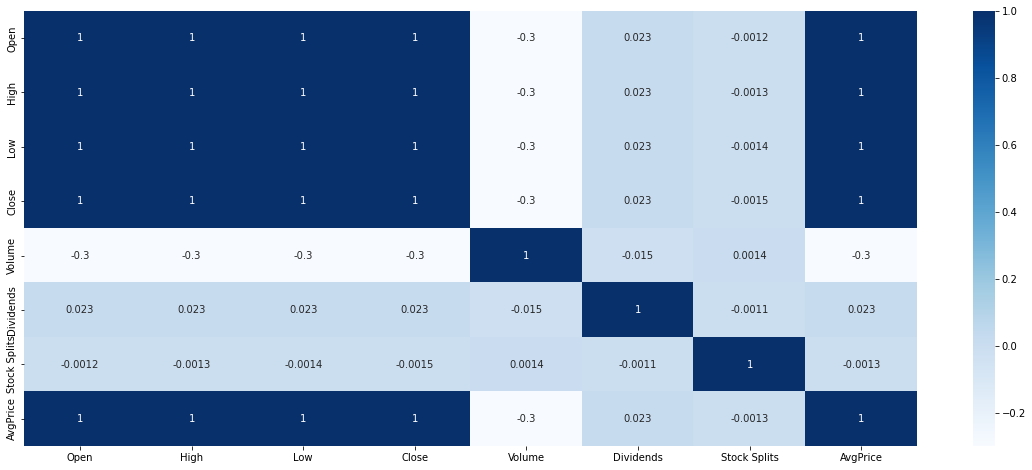

In [31]:
#Correlation using Original Dataset
import matplotlib.pyplot as plt
import seaborn as sns

df2 = df[['Open','High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits','AvgPrice']]
plt.figure(figsize=(20,8))
sns.heatmap(df2.corr(),cmap='Blues',annot=True)

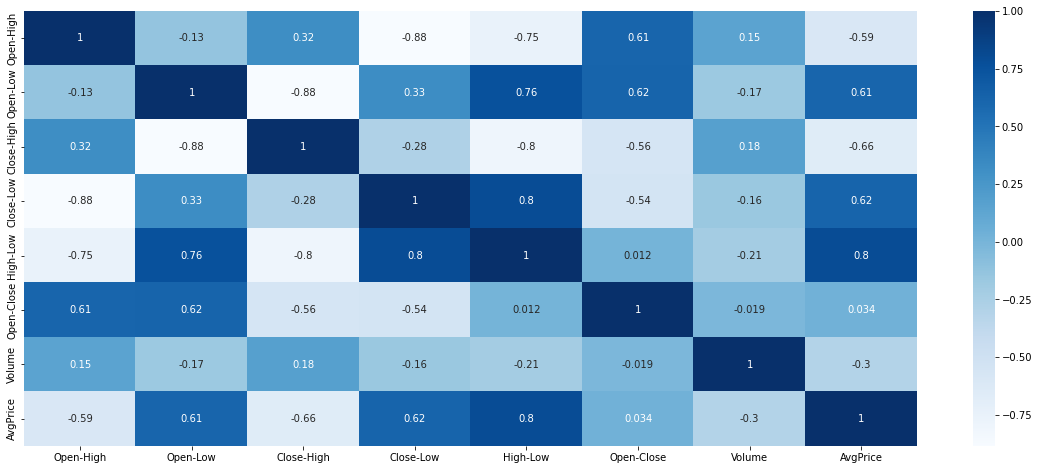

In [32]:
#Correlation among added columns
df3 = df[['Open-High','Open-Low', 'Close-High', 'Close-Low', 'High-Low', 'Open-Close','Volume','AvgPrice']]
plt.figure(figsize=(20,8))
sns.heatmap(df3.corr(),cmap='Blues',annot=True)


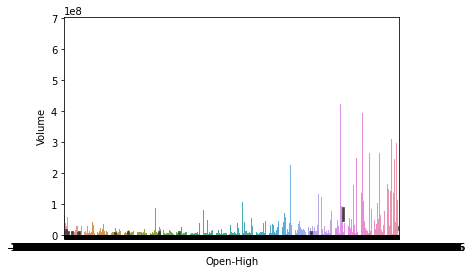

In [33]:
sns.barplot(data = df, x = "Open-High", y="Volume")

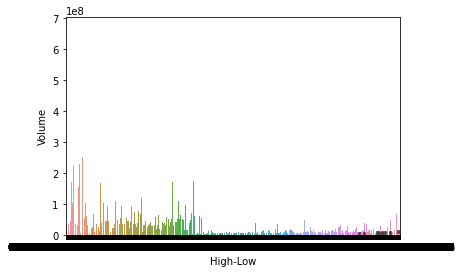

In [34]:
sns.barplot(data=df, x = "High-Low", y="Volume")

In [35]:
#Conversion done for plotting Moving Average Chart
df.dtypes
df['Date'] = df['Date'].astype(str)

Text(0, 0.5, 'Reliance Stock')

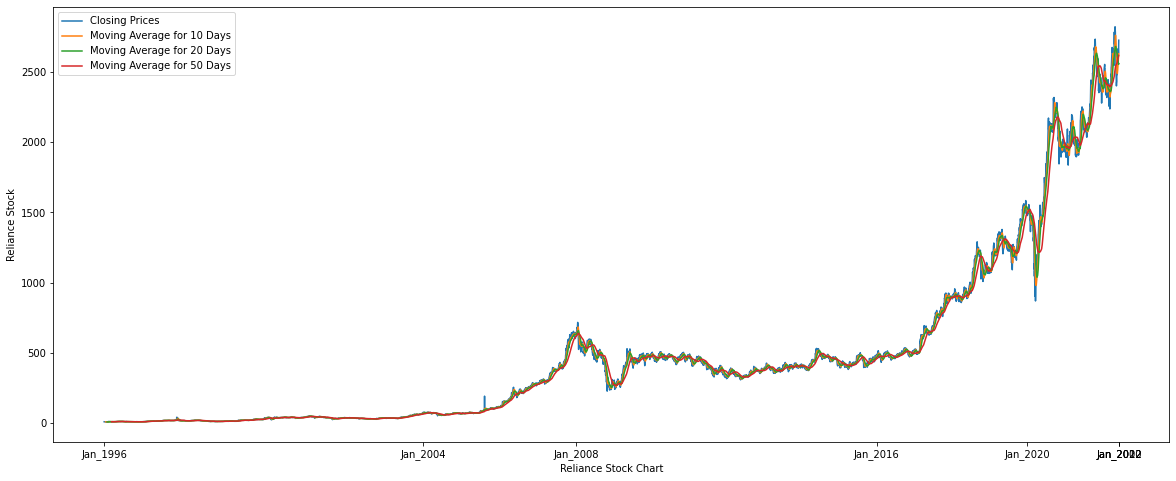

In [36]:
#Plotting Moving Average Graph
# set figure size
plt.figure( figsize = (20, 8))
  
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'Date',
             y = 'Close',
             data = df,
             label = 'Closing Prices')
  
# plot using rolling average
sns.lineplot( x = 'Date',
             y = 'MA for 10 days',
             data = df,
             label = 'Moving Average for 10 Days')

# plot using rolling average
sns.lineplot( x = 'Date',
             y = 'MA for 20 days',
             data = df,
             label = 'Moving Average for 20 Days')

# plot using rolling average
sns.lineplot( x = 'Date',
             y = 'MA for 50 days',
             data = df,
             label = 'Moving Average for 50 Days')
  
plt.xlabel('Reliance Stock Chart')
  
# setting customized ticklabels for x axis
pos = [ '1996-01-01', '2000-01-01', '2004-01-01', '2008-01-01', 
       '2012-01-01', '2016-01-01', '2020-01-01', '2022-01-01']
  

lab = [ 'Jan_1996', 'Jan_2000', 'Jan_2004', 'Jan_2008', 
       'Jan_2012', 'Jan_2016','Jan_2020','Jan_2022']
       
  
plt.xticks( pos, lab)
  
plt.ylabel('Reliance Stock')